In [1]:
import numpy as np
import scipy.stats as stats
import random
import matplotlib.pyplot as plt
import pandas as pd

### Reto 1

- Crea dos distribuciones normales iguales
- Obten 30 muestras de cada distribucion
- Utilizando un test estadístico t-test, comprueba si la hipotesis nula se rechaza en favor de la hipótesis alternativa, con un $\alpha=0.05$


In [2]:
def t_test():
    #Dos distribuciones normales iguales:
    n1 = []
    n2 = []
    for i in range(1,101):
        n1.append(np.random.normal()) 
        n2.append(np.random.normal()) 

    #30 Muestras:
    sampleo1 = random.sample(n1, 30)
    sampleo2 = random.sample(n2, 30)

    #Contraste de hipotesis con t-test

    stats.ttest_ind(sampleo1,sampleo2)  
    
    alpha = 0.05
    pvalue=stats.ttest_ind(sampleo1,sampleo2).pvalue
    if pvalue < alpha: return('rechazamos H0 y aceptamos H1')
    else: return('aceptamos H0 y rechazamos H1')    
    

- Repite este proceso 1000 veces y obtén el numero de veces que se rechaza la hipótesis nula en favor de la alternativa respecto al total de veces que se ha hecho este proceso
- ¿Qué significa esto?

- Opcional: puedes dibujar un plot en el que el eje X sea el numero de simulaciones y el eje Y sea la fraccion de veces que la hipotesis alternativa se ha aceptado

In [3]:
def simulacion_t_test(simulaciones):
    veces_rechazamos_nula = 0
    for i in range(1,simulaciones):
        if t_test() == 'rechazamos H0 y aceptamos H1': veces_rechazamos_nula +=1
    return veces_rechazamos_nula/simulaciones

                                                                                                    #plt.xlabel('Nº Simulaciones')
                                                                                                        #plt.ylabel('Probabilidad')
                                                                                        #plt.plot(range(1,101),simulacion_t_test(101))

def mensaje(simulaciones):
    print(f'Con una simulacion de {simulaciones} obtenemos una probabilidad de rechazar la hipotesis nula (igualdad medias) de {simulacion_t_test(simulaciones)}')
mensaje(1000)

Con una simulacion de 1000 obtenemos una probabilidad de rechazar la hipotesis nula (igualdad medias) de 0.051


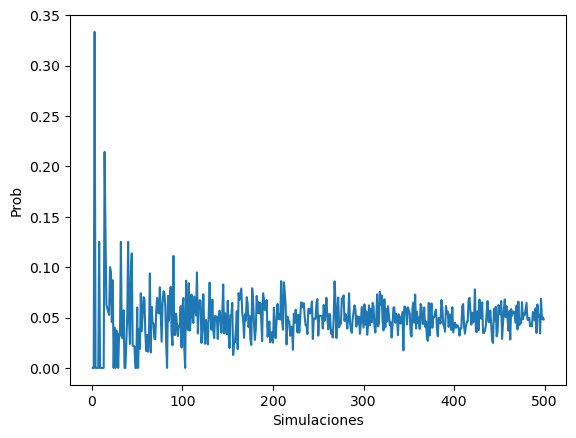

In [4]:
def dibujar_reto1(simulaciones):
    prob = []
    for i in range(1,simulaciones):
        prob.append(simulacion_t_test(i))
    plt.xlabel("Simulaciones")
    plt.ylabel("Prob")
    plt.plot(range(1,simulaciones),prob)
    
dibujar_reto1(500)

### Reto 2

- Crea dos distribuciones normales (una con $\mu=7, \sigma=1$ y otra con $\mu=7.0001, \sigma=1$)
- Obten 100.000 muestras de cada distribucion
- Utilizando un test estadístico t-test, comprueba si la hipotesis nula se rechaza en favor de la hipótesis alternativa, con un $\alpha=0.05$


In [5]:
def t_test_2():
    r7 = []
    r71 = []
    #genera numeros con distrib normal
    for i in range(1,10001):
        r7.append(np.random.normal(7,1))
    
    for i in range(1,10001):
        r71.append(np.random.normal(7.0001,1))
    
    nr7 = np.array(r7)
    nr71 = np.array(r71)

    #T test

    stats.ttest_ind(nr7,nr71)  
    
    alpha = 0.05
    pvalue=stats.ttest_ind(nr7,nr71).pvalue
    if pvalue < alpha: return('rechazamos H0 y aceptamos H1')
    else: return('aceptamos H0 y rechazamos H1') 

t_test_2()

'aceptamos H0 y rechazamos H1'

- Repite este proceso 1000 veces y obtén el numero de veces que se rechaza la hipótesis nula en favor de la alternativa respecto al total de veces que se ha hecho este proceso
- ¿Qué significa esto?

In [6]:
def simulacion_t_test_2(simulaciones):
    veces_rechazamos_nula = 0
    for i in range(1,simulaciones):
        if t_test_2() == 'rechazamos H0 y aceptamos H1': veces_rechazamos_nula +=1
    return veces_rechazamos_nula/simulaciones

def mensaje2(simulaciones):
    print(f'Con una simulacion de {simulaciones} obtenemos una probabilidad de rechazar la hipotesis nula (igualdad medias) de {simulacion_t_test_2(simulaciones)}')
mensaje2(1000)     

Con una simulacion de 1000 obtenemos una probabilidad de rechazar la hipotesis nula (igualdad medias) de 0.053


### Reto 3

Supongamos que una empresa de la industria del café afirma que su peso medio del paquete de café es de 500 gramos. Recoges una muestra de 30 paquetes para testar esta afirmación. Utiliza la prueba t de una muestra para evaluar si la media poblacional es realmente de 500 gramos con un nivel de significancia del 0.05.

In [7]:
muestras = [507.84, 488.19, 501.65, 494.70,
           479.79, 505.65, 500.42, 503.53,
           486.65 , 505.63, 486.26, 498.87,
           490.56, 502.16 , 491.24 , 506.23,
           503.81, 493.83, 509.51, 491.74,
           488.10 , 496.29 , 501.80, 490.73,
           493.97, 486.00, 498.68, 498.72,
           473.91, 483.49]

In [8]:
#Definimos la poblacion con media 500
paquetes = []
for i in range(1,10):
    paquetes.append(np.random.normal(500)) 
    
#Hacemos el t.test
stats.ttest_ind(muestras,paquetes)  
   
#Conclusion
alpha = 0.05
pvalue=stats.ttest_ind(paquetes,muestras).pvalue
if pvalue < alpha: print('rechazamos H0 (igualdad de medias) y aceptamos H1')
else: print('aceptamos H0 (igualdad de medias) y rechazamos H1, segun la muestra sus paquetes de cafe tienen media de 500 gramos') 

aceptamos H0 (igualdad de medias) y rechazamos H1, segun la muestra sus paquetes de cafe tienen media de 500 gramos


### Reto 4

Los siguientes datos son notas de un examen de dos clases distintas. Realizar un contraste de hipótesis para comprobar si las notas de una clase fueron mejores que las de la otra. Comprobar los requisitos para poder aplicar el ttest.

In [9]:
A = [5.02, 6.5, 8.17, 7.08, 4.95, 8.76, 6.66, 7.51, 7.46, 7.7]
B = [8.9, 7.36, 4.73, 7.41, 8.64, 5.78, 4.77, 7.63, 5.51, 7.05]

Para comprobar normalidad hacemos el test de shapiro para las muestras:

In [10]:
shapiro_test_A = stats.shapiro(A)
shapiro_test_A

ShapiroResult(statistic=0.9305169582366943, pvalue=0.45299679040908813)

In [11]:
shapiro_test_B = stats.shapiro(B)
shapiro_test_B

ShapiroResult(statistic=0.9229233264923096, pvalue=0.38198283314704895)

Rechazamos hipotesis de normalidad para ambas muestras por estar el pvalue muy lejos de 1, por lo que usaremos un test no parametrico, Mann Whitney U

In [14]:
pvalue = stats.mannwhitneyu(A,B).pvalue
alpha = 0.05
if pvalue < alpha: print(f'rechazamos H0 (igualdad de medias) y aceptamos H1 con un {100-alpha*100}% de confianza')
else: print(f'aceptamos H0 (igualdad de medias)  y rechazamos H1 con un {100-alpha*100}% de confianza')

aceptamos H0 (igualdad de medias)  y rechazamos H1 con un 95.0% de confianza


### Reto 5 (abierto)

Abre un dataset de tu elección y escoge alguna feature. Crea dos grupos separados por otra feature (por ejemplo, edad como feature y los grupos que creas son los que se salvaron vs. los que no se salvaron).

Aplica el test correspondiente para saber si existe alguna diferencia significativa en esos grupos en base a esa feature.

In [28]:
#Escogemos un dataset y lo divimos en dos subdataframes para comparar

titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

titanic_supervivientes = titanic[titanic.Survived == 1
                                ]
titanic_victimas = titanic[titanic.Survived == 0]


In [29]:
shapiro_test_V = stats.shapiro(titanic_victimas.Age)
shapiro_test_V

ShapiroResult(statistic=nan, pvalue=1.0)

In [30]:
shapiro_test_S = stats.shapiro(titanic_supervivientes.Age)
shapiro_test_S

ShapiroResult(statistic=nan, pvalue=1.0)

Al tener ambas muestras un pvalue en el test de shapiro de 1 confirmamos normalidad

In [31]:
#Hacemos el t.test
stats.ttest_ind(shapiro_test_V,shapiro_test_S)  
   
#Conclusion
alpha = 0.05
pvalue=stats.ttest_ind(paquetes,muestras).pvalue
if pvalue < alpha: print('rechazamos H0 (igualdad de medias) y aceptamos H1')
else: print('aceptamos H0 (igualdad de medias) y rechazamos H1, segun la muestra ambos grupos tenian igual edad media') 

aceptamos H0 (igualdad de medias) y rechazamos H1, segun la muestra ambos grupos tenian igual edad media
